<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [42]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import variation

In [43]:
sns.__version__

'0.10.1'

In [44]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'



Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [45]:
dataset = pd.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [46]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [47]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [48]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,2017,DZA,Algeria,Middle East & North Africa,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,2017,AGO,Angola,Sub-Saharan Africa,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,2017,ARM,Armenia,Caucasus & Central Asia,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,-,10,10,10,10,10,9.29,7,8.18,6,8.73,4
1616,2008,DNK,Denmark,Western Europe,-,10,10,10,10,10,9.49,3,7.98,9,8.73,4
1617,2008,CHE,Switzerland,Western Europe,-,10,10,10,10,10,9.31,6,8.35,4,8.83,3
1618,2008,NZL,New Zealand,Oceania,-,10,10,10,10,10,9.42,4,8.46,3,8.94,2


Si analizamos los tipos, vemos que casi todas las columnas 

*   Elemento de lista

*   Elemento de lista
*   Elemento de lista


*   Elemento de lista

se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [49]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [50]:
dataset = dataset[important_cols].replace('-', np.nan)
for score_col in score_cols:
  dataset[score_col] = pd.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


In [51]:
print("Listado de valores unicos en Region")
print("-"*35)
print(dataset.region.unique())
print("\nCantidad de elementos: ",len(dataset.region.unique()))

Listado de valores unicos en Region
-----------------------------------
['Eastern Europe' 'Middle East & North Africa' 'Sub-Saharan Africa'
 'Latin America & the Caribbean' 'Caucasus & Central Asia' 'Oceania'
 'Western Europe' 'South Asia' 'North America' 'East Asia']

Cantidad de elementos:  10


In [52]:
print("Listado de valores unicos en \"countries\"")
print("-"*40)
print(dataset.countries.unique())
print("\nCantidad de elementos: ",len(dataset.countries.unique()))

Listado de valores unicos en "countries"
----------------------------------------
['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Central Afr. Rep.'
 'Chad' 'Chile' 'China' 'Colombia' 'Congo, Dem. R.' 'Congo, Rep. Of'
 'Costa Rica' "C?te d'Ivoire" 'Croatia' 'Cyprus' 'Czech Rep.' 'Denmark'
 'Dominican Rep.' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia, The' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Korea, South' 'Kuwait' 'Kyrgyz Republic' '

En nuestro dataframe, se encuentran indicadores anuales para 162 paises agrupados en 10 regiones.
En nuestro analisis nos vamos a centrar en America Latina y los paises que lo conforman.

# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  3. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  3. ¿Tiene sentido calcular la moda?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

**1.1.Para comenzar con un pantallazo de los datos, calcular el rango de las variables**


In [53]:
dataset.describe()

,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
count,1620.000000,308.000000,1537.000000,1540.000000,1540.000000,1519.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000
mean,2012.500000,6.379870,6.701366,7.922078,7.314935,7.485188,7.280649,7.163409,77.671429,6.792981,77.420779,6.978214,77.465584
std,2.873168,3.640415,4.685828,4.038529,4.056317,3.502156,3.181577,1.392409,44.757695,0.906827,44.776169,1.056239,44.782074
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000,1.000000,2.580000,1.000000,3.690000,1.000000
25%,2010.000000,7.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.147500,39.000000,6.220000,39.000000,6.280000,39.000000
50%,2012.500000,7.000000,10.000000,10.000000,10.000000,10.000000,8.800000,7.145000,77.500000,6.880000,77.000000,6.900000,77.000000
75%,2015.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.380000,116.000000,7.440000,116.000000,7.880000,116.000000
max,2017.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.560000,162.000000,9.110000,162.000000,9.120000,162.000000


Mediante un descriptivo se puede observar, no solo la cantidad de observaciones que hay en cada uno de los indicadores, sino también cuales son sus medidas centrales (media, mediana, entre otras). En nuestro set de datos tenemos distintos indicadores de libertad, desde el año 2008 al 2017, para 162 paises.


**1.2.Para cada país, tenemos varias realizaciones para cada variable pf_identity y hf_score. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana?**

A nivel general, como se esta trabajando con series temporales es posible mediante gráficos de líneas ver la tendencia y la evolución de el hf_score. En este caso, se graficaron todo los países.

<Figure size 432x288 with 0 Axes>

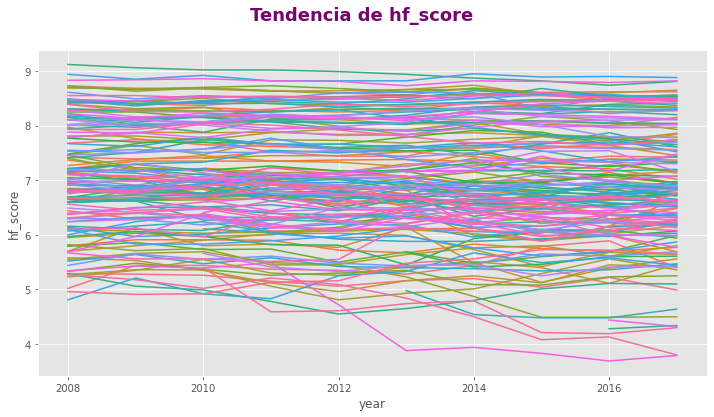

<Figure size 432x288 with 0 Axes>

In [54]:
# Realizaciones de la variable hf_score por pais
plt.figure(figsize=(12,6))
grid = sns.lineplot(data=dataset, x='year', y='hf_score', hue='ISO_code', legend=False)
plt.suptitle("Tendencia de hf_score",fontweight='bold',color='#75046C',size='18')
plt.figure()



Si bien, este grafico tiene demasiada información, lo cual no nos permite realizar un analisis claro, podemos observar que la mayoria de los paises se comportan de manera similar a traves de los años, con excepcion de algunos que muestran bajas importantes. La mayoria de los paises tienen un indicador en un rango de 5 a 10, salvo en los ultimos años (a partir del 2013) donde algunos paises muestran indicadores bajos, en terminos relativos.

Una primera alternativa para indagar sobre el comportamiento de dos paises, en cada uno de los indicadores analizados, es ver sus valores año a año.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 0.98, ' "pf_identity/year"')

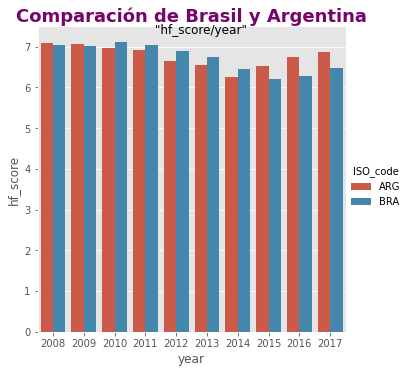

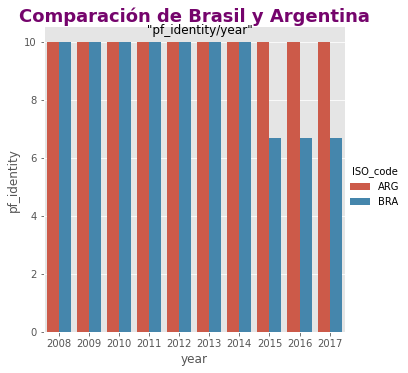

In [55]:
bra_arg = dataset[dataset.ISO_code.isin(['ARG', 'BRA'])]
sns.factorplot(x='year', y='hf_score', hue='ISO_code', data=bra_arg, kind='bar')
plt.title("Comparación de Brasil y Argentina",fontweight='bold',color='#75046C',size='18')
plt.suptitle(' \"hf_score/year\"')
sns.factorplot(x='year', y='pf_identity', hue='ISO_code', data=bra_arg, kind='bar')
plt.title("Comparación de Brasil y Argentina",fontweight='bold',color='#75046C',size='18')
plt.suptitle(' \"pf_identity/year\"')

En un primer gráfico, comparando Brasil y Argentina, respecto a sus resultados anuales en el indicador hf score, se observa que: a principios de nuestra serie, año 2008-2009, ambos paises muestran valores de indicadores muy similares; para los años 2010-2014 comienza a notarse una leve diferencia entre un pais y otro a favor de Brasil; mientras que para el periodo 2015-2017 esta tendencia cambia y Argentina muestra mejores resultados.
Ambos paises muestran una baja en sus numeros, Argentina en el año 2014 mientras que Brasil en el año 2015, para luego aumentar levemente.

Si se observa el comportamiento del indicador pf_identity, se puede observar que para los años 2008- 2014, ambos paises muestran indicadores de 10 puntos, mientras que para los años restantes (2015-2018) Brasil experimenta una disminución de 10 puntos a 6.5 aproximadamente en su indicador.

Una segunda alternativa para analizar dos paises es indagar sobre sus medidas: la media, mediana, desviación estándar y el coeficiente de variación de ambos países.




In [56]:
# Comparacion de Media, Mediana y STD por pais.

bra_arg.groupby(['ISO_code']).agg(
    hf_score_mean=pd.NamedAgg(column='hf_score', aggfunc=np.mean),
    hf_score_median=pd.NamedAgg(column='hf_score', aggfunc=np.median),
    hf_score_std=pd.NamedAgg(column='hf_score', aggfunc=np.std),
    hf_score_cv=pd.NamedAgg(column='hf_score', aggfunc=stats.variation))
   

,hf_score_mean,hf_score_median,hf_score_std,hf_score_cv
ISO_code,,,,
ARG,6.766,6.805,0.264835,0.037133
BRA,6.730,6.820,0.346538,0.048849


En cuanto al indicador hf_score se observa que no existen muchas diferencias entre los medidas de Brasil y Argentina, tienen una media, mediana y desviación estandar similar. En cuanto al coeficiente de variacion, es una medida de dispersion importante a analizar cuando se comparan dos grupos con medias diferentes. En este caso, se observa que la variacion relativa en ambas paises es practicamente nula.

In [57]:
# Comparacion de Media, Mediana y STD por pais.

bra_arg.groupby(['ISO_code']).agg(
    pf_identity_min=pd.NamedAgg(column='pf_identity', aggfunc=np.min),
    pf_identity_max=pd.NamedAgg(column='pf_identity', aggfunc=np.max),
    pf_identity_mean=pd.NamedAgg(column='pf_identity', aggfunc=np.mean),
    pf_identity_median=pd.NamedAgg(column='pf_identity', aggfunc=np.median),
    pf_identity_std=pd.NamedAgg(column='pf_identity', aggfunc=np.std),
    pf_identity_cv=pd.NamedAgg(column='pf_identity', aggfunc=stats.variation))

,pf_identity_min,pf_identity_max,pf_identity_mean,pf_identity_median,pf_identity_std,pf_identity_cv
ISO_code,,,,,,
ARG,10.0,10.0,10.00,10.0,0.000000,0.000000
BRA,6.7,10.0,9.01,10.0,1.594051,0.167841


En cuanto al indicador pf_identity se observa que Argentina, en todos sus años ha tenido valores de 10 puntos en este indicador, ya que el minimo, el maximo, la media y la mediana coinciden, lo cual tampoco tenemos variacion y un coeficiente de variacion distinto de cero.
Si se analiza Brasil, existe tambien valores altos en sus medidas centrales, pero al tener una media menor que la mediana tiende a ser una distribución mas asimetrica izquierda, y concentrar mas datos en los valores superiores del indicador. En contraposición a Argentina, Brasil muestra una minima dispersion en sus datos.


**1.3.Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.** 
**¿Tiene sentido calcular la moda?** 

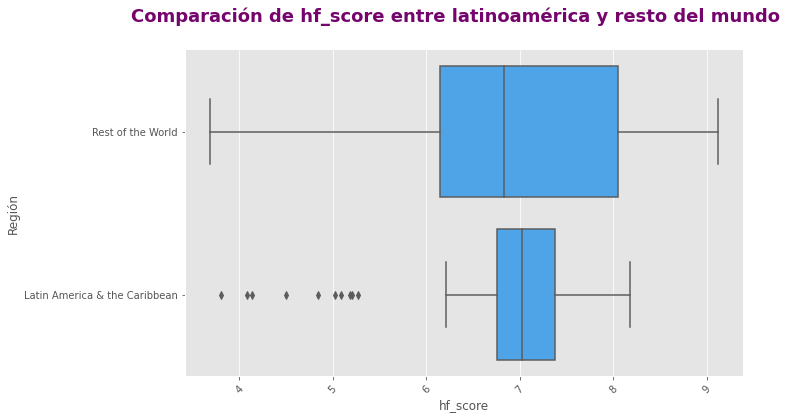

In [58]:
##
# hf_score
##
plt.figure(figsize=(10,6))
dataset['region_new'] = dataset['region'].apply(lambda x: 'Rest of the World'if x != 'Latin America & the Caribbean' else 'Latin America & the Caribbean')
sns.boxplot(data=dataset,
                x='hf_score', y='region_new',
                color=BLUE)
plt.ylabel('Región')
plt.xlabel('hf_score')
plt.suptitle('Comparación de hf_score entre latinoamérica y resto del mundo',fontweight='bold',color='#75046C',size='18')
plt.xticks(rotation=45)
sns.despine()

En cuanto a el indicador hf_score, la tabla descriptiva y el bloxpot son las herramientas más útiles para poder describir a grandes rasgos como se comporta una distribución. En este caso, si comparamos la situación de America Latina y el resto del mundo se observa un comportamiento distinto en cada grupo.
En cuanto a el resto del mundo, se observa una distribución asimétrica derecha, ya que existe una mayor cantidad de países que en sus años de análisis han reportado indicadores mayores que 6. En un segundo lugar, se puede observar como existe una una gran amplitud en la distribución ya que hay valores mínimos que rondan los 3 puntos y valores máximos que estan cercanos a los 9 puntos, y por último, podemos observar que el 50% de los datos se encuentra entre los valores 5 y 8 aproximadamente.
En cambio si se observa la distribución de el hf_Score en America Latina se observa una distribución con mayor simetría, ya que tenemos observaciones con valores mínimos cercanos a los 6 puntos y máximos a 8 puntos, con una concentracion del 50% de los datos en torno del 6.5 y 7.5. En America Latina existen lo que se llama, valores "atípicos" y/o valores "extremos" que son aquellos valores que quedan fuera de la distribución por 1.5 o 3 veces el rango intercuartilico, respectivamente. En el gráfico se puede observar como puntitos en los valores bajos.


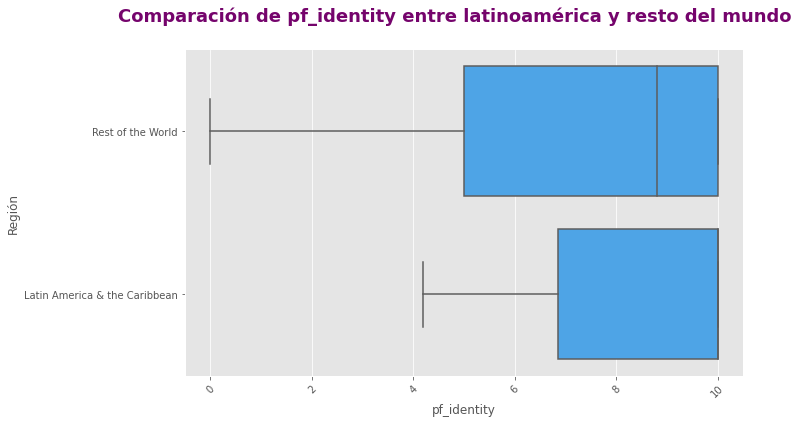

In [59]:
##
# pf_identity
##
plt.figure(figsize=(10,6))
dataset['region_new'] = dataset['region'].apply(lambda x: 'Rest of the World'if x != 'Latin America & the Caribbean' else 'Latin America & the Caribbean')
sns.boxplot(data=dataset,
                x='pf_identity', y='region_new',
                color=BLUE)
plt.ylabel('Región')
plt.xlabel('pf_identity')
plt.suptitle('Comparación de pf_identity entre latinoamérica y resto del mundo',fontweight='bold',color='#75046C',size='18')
plt.xticks(rotation=45)
sns.despine()

In [60]:

dataset.groupby(['region_new']).agg(
    pf_identity_mean=pd.NamedAgg(column='pf_identity', aggfunc=np.mean),
    pf_identity_median=pd.NamedAgg(column='pf_identity', aggfunc=np.median),
    pf_identity_std=pd.NamedAgg(column='pf_identity', aggfunc=np.std),
    pf_identity_cv=pd.NamedAgg(column='pf_identity', aggfunc=stats.variation))

,pf_identity_mean,pf_identity_median,pf_identity_std,pf_identity_cv
region_new,,,,
Latin America & the Caribbean,8.582171,10.0,1.875832,NaN
Rest of the World,7.018721,8.8,3.323457,NaN


Si se observan las distribuciones de los indicadores pf_identity en ambos grupos se observa que ambas distribuciones son asimétricas izquierdas, con la mayoría de sus datos en la los rangos superiores.
En el caso del resto del mundo, se observa que el 75% de las observaciones se encuentran con un indicador arriba de los 5 puntos mientras que el restante 25 tiene valores que comienzan desde los 3 puntos aproximadamente. En el caso de el resto del mundo, si bien también tiene una distribución asimetrica izquieda tiene una mayor concentración de los datos en los valores superiores de 6.5 (el 75% de las observaciones) mientras que el 25 inferior se ubica entre los rangos 4 y 6.5.
En ambos casos el 25% superior de las distribuciones se encuentra en el valor máximo.

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?



**2.1. Grafiquen la media de la variable pf_identity y hf_score a través de los años.**


<Figure size 432x288 with 0 Axes>

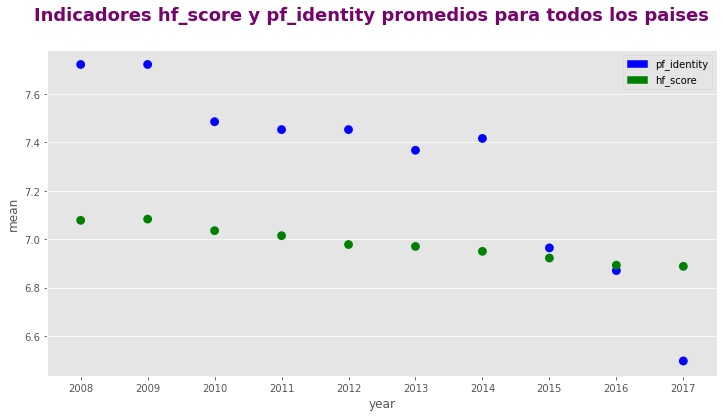

<Figure size 432x288 with 0 Axes>

In [61]:
# Media de la variable 'pf_identity' y hf_score por años.
import matplotlib.patches as mpatches
plt.figure(figsize=(12,6))
sns.pointplot(data=dataset.groupby('year')['pf_identity'].mean().reset_index(), x='year', y='pf_identity', color = "Blue", join=False)
sns.pointplot(data=dataset.groupby('year')['hf_score'].mean().reset_index(), x='year', y='hf_score', color="Green", join=False)
plt.legend(handles=[mpatches.Patch(color='Blue', label='pf_identity'), mpatches.Patch(color='Green',label='hf_score')])
plt.ylabel("mean")
plt.suptitle('Indicadores hf_score y pf_identity promedios para todos los paises' ,fontweight="bold", color="#75046C" ,size="18")
plt.figure()


En el periodo 2008-2015 el indicador de libertad personal reportado por los países, tienen medias superiores que el  indicador hf_score general. Mientras que en los años subsiguientes al 2015 el indicador de libertad personal muestra una baja importante en la media de los países llegando a coincidir en sus valores para los años 2015 y 2016, y incluso a ser menor el indicador de libertad personal, para el 2017.

**2.2.Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?**

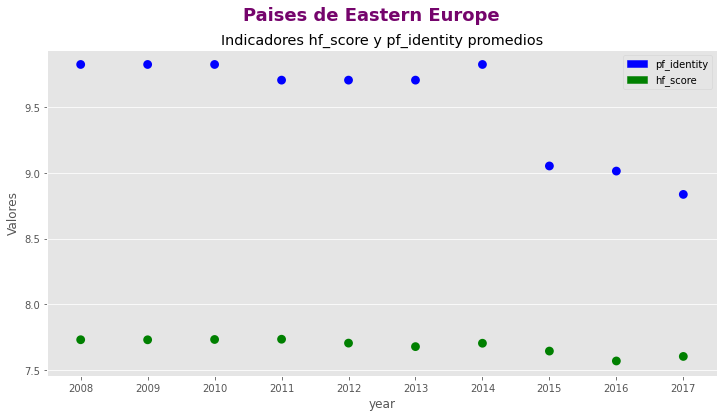

<Figure size 432x288 with 0 Axes>

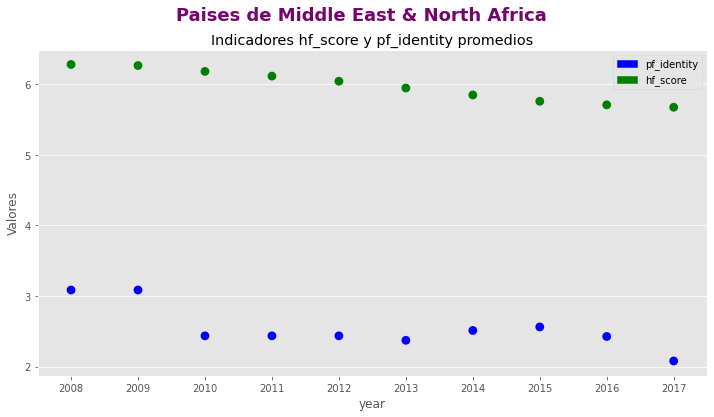

<Figure size 432x288 with 0 Axes>

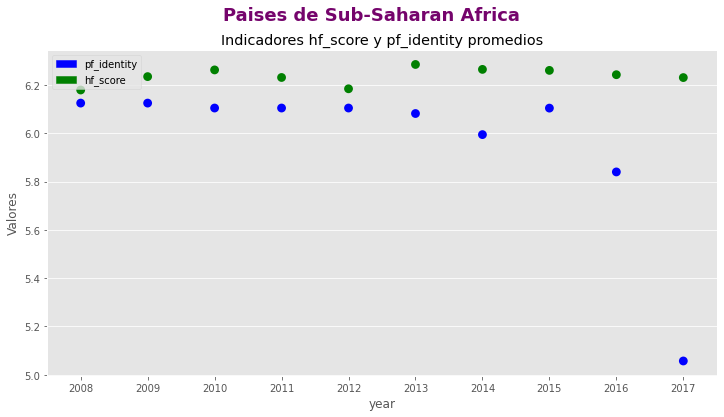

<Figure size 432x288 with 0 Axes>

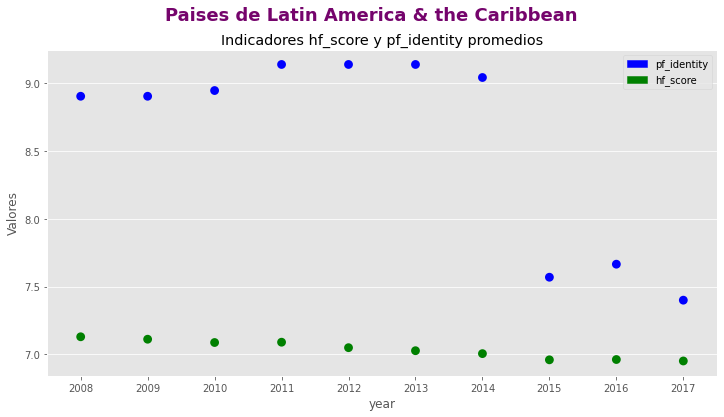

<Figure size 432x288 with 0 Axes>

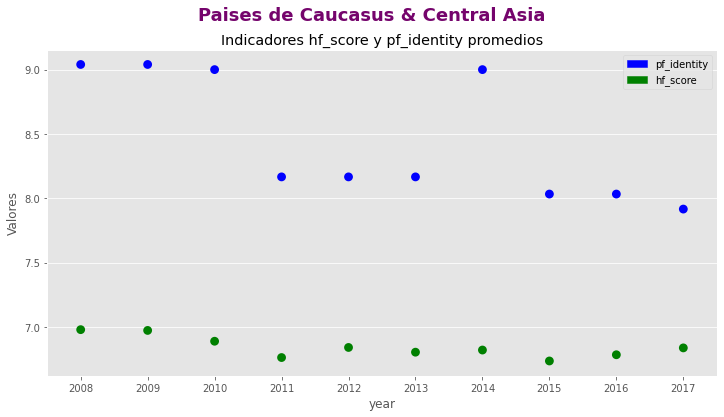

<Figure size 432x288 with 0 Axes>

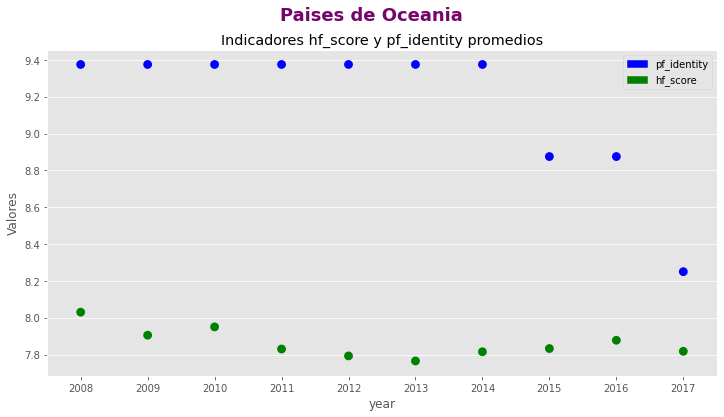

<Figure size 432x288 with 0 Axes>

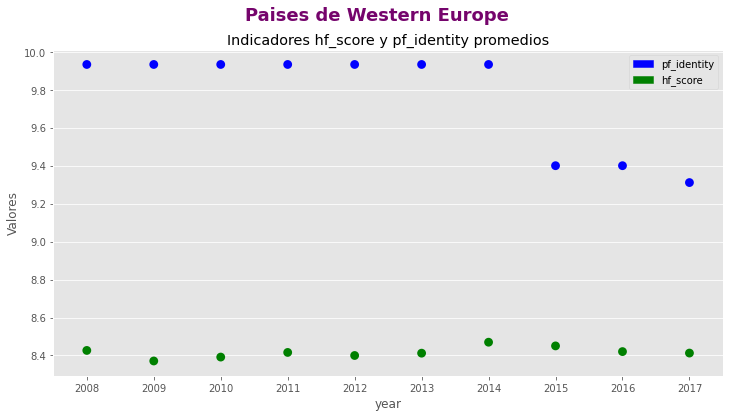

<Figure size 432x288 with 0 Axes>

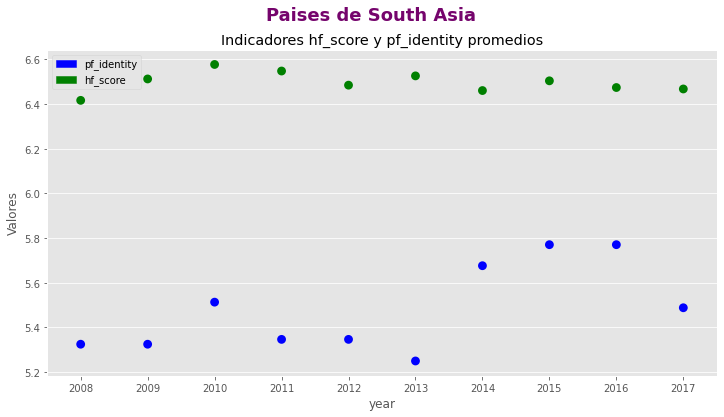

<Figure size 432x288 with 0 Axes>

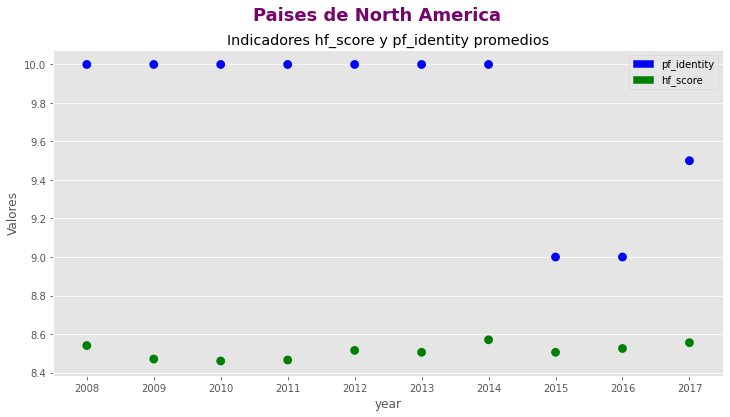

<Figure size 432x288 with 0 Axes>

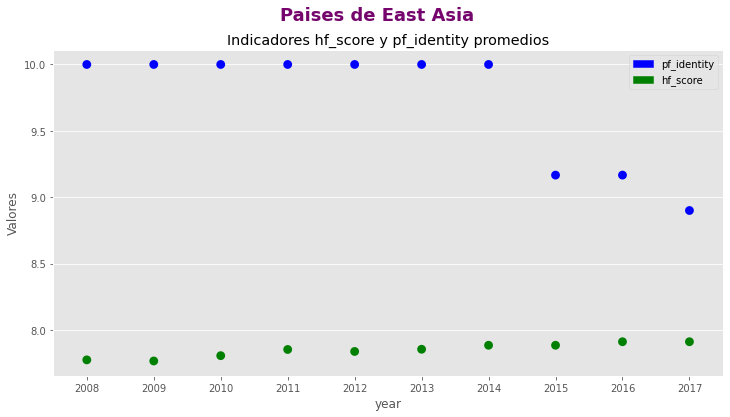

<Figure size 432x288 with 0 Axes>

In [62]:
#Nueva vizualizacion de graficos <for>
regiones=dataset.region.unique()
for i in regiones:
  region = dataset[dataset.region == i]
  plt.figure(figsize=(12,6))
  sns.pointplot(data=region.groupby('year')['pf_identity'].mean().reset_index(), x='year', y='pf_identity', color = "Blue", join=False)
  sns.pointplot(data=region.groupby('year')['hf_score'].mean().reset_index(), x='year', y='hf_score', color="Green", join=False)
  plt.legend(handles=[mpatches.Patch(color='Blue', label='pf_identity'), mpatches.Patch(color='Green',label='hf_score')])
  plt.ylabel("Valores")
  plt.suptitle('Paises de '+ i,fontweight="bold", color="#75046C" ,size="18")
  plt.title('Indicadores hf_score y pf_identity promedios')
  plt.figure()

En el primer gráfico, correspondiente a Eastern Europe, el indicador hf_score se mantuvo estable y considerablemente bajo, mientras que el pf_identity se mantiene con valores altos a través de los años (superando el 9.5), experimentando un pico de suba en el año 2014 para luego comenzar a bajar en los siguientes años, llegando a su punto más bajo en el 2017. En la región de Western Europe, el indicador pf_identity roza los 10 puntos, llegando al pico más alto posible de ese indicador. 
En el caso de Middle East y el Norte de África, ocurre exactamente lo inverso. El indicador pf_identity se mantiene relativamente bajo durante los años, no superando los 3 puntos aproximadamente, y llegando a su valor más bajo en el 2017. Mientras que el indicador hf_score supera casi siempre los 6 puntos, bajando en el 2017 muy poco, a un 5.9 aproximadamente. Mostrando lo diferente que son ambas regiones en cuanto a los componentes de cada uno de los indicadores (identidad, economía, libertad personal, etc). En la región de Sub Sahara ambos indicadores se mantienen estables, y alrededor de los 6 puntos ambos. Experimentando una baja considerable el pf_identity en el 2017. Donde nos marca que algo quizás ocurrió en la región que llevó a esta baja considerable en el último año.
Si tomamos las regiones que conforman Asia, entendemos porqué es tan importante ver los gráficos de las regiones por separado. En el caso de Asia del sur, por ejemplo, ambos indicadores se mantienen cerca del 6, pero en Asia central, ambos indicadores puntean mucho mas alto, llegando el pf_identity a los 9 puntos,y experimentando bajas de 1 punto nomás, en los años 2011, 2012, 2013, y luego en el 2015, 2016, 2017. Mostrando que en un mismo continente, podemos encontrar puntajes tan diversos como en estos dos casos. 
En el caso de Oceanía, el indicador pf_identity se mantiene estable a través de los años entre 9.3 /9.4 (puntajes considerablemente altos para este indicador), experimentando bajas en el año 2015, y llegando a su punto mas bajo en el 2017. El indicador hf_score se mantiene estable realtivamente alto, entre 8.1 y 7.8.
En el caso de Amércia, tomamos primero América del Norte. Ahí nos encontramos con un pf_identity estable en los 10 puntos, bajando este indicador su puntaje (pero solo en 1 punto, no siendo una baja tan considerable) en el 2015 pero para volver a subir en el 2017. Con respecto al hf_score, se mantiene estable entre el 8.6 y el 8.4. Ambos indicadores con puntajes altos en esta región. En el caso de America Latina y el Caribe, el pf_identity se encuentra estable pero un punto mas abajo que en América del Norte, presentando valores entre 9 y 9.5. Luego baja dos puntos (a 7 aproximadamente) en el año 2015, y por el contrario, no vuelve a subir en el 2017. El hf_score se mantiene estable en esta región a través de los años, en un puntaje alrededor de 7.
Todo esto nos muestra que desglosando cada gráfico y evaluándolo por separado entendemos las diferencias existentes en cada región, y podemos hacer análisis diversos, importantes y por separado, que no son posibles al calcular la media de todo el dataset en conjunto.







**2.3.Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?**


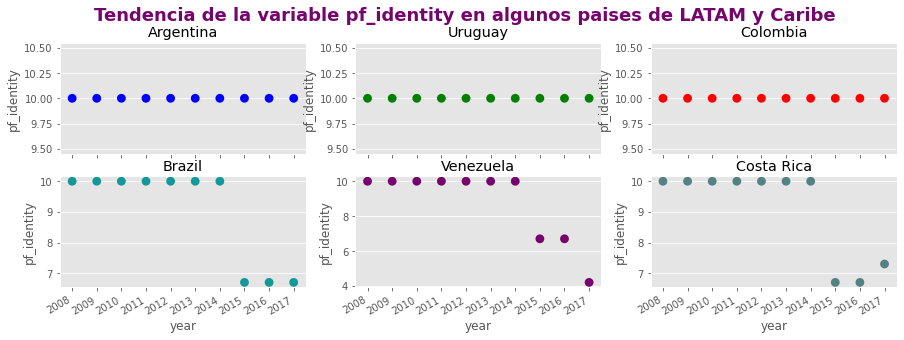

In [63]:
#Muestro los países de latinoamérica y el caribe para el año 2017.
import math

paisesLC = ['Argentina','Uruguay','Colombia','Brazil','Venezuela','Costa Rica']
color = ['Blue','Green','Red','#129997','#75046C',"#548181"]
#config Subplots
nColumnas = 3
nFilas = int(math.ceil(len(paisesLC)/nColumnas))
fig, axs = plt.subplots(nFilas,nColumnas,figsize=(15, 5))
for i, ax in zip(range(0, len(paisesLC)), axs.flat):
  dataPais = dataset[dataset.countries == paisesLC[i] ]
  ax.set_title(paisesLC[i])
  sns.pointplot(data=dataPais.groupby('year')['pf_identity'].mean().reset_index(), x='year', y='pf_identity', color = color[i], join=False, ax=ax)
plt.suptitle("Tendencia de la variable pf_identity en algunos paises de LATAM y Caribe",fontweight="bold", color="#75046C" ,size="18")

fig.autofmt_xdate()




Si se selecciona algunos paises de America latina para indagar que sucede con el indicador pf_identity se observa que, en la mayoría de los años cada pais reporta indicadores de nivel de libertad máximos (10), salvo algunos países particulares que para los años 2015, 2016 y 2017 muestran indicadores cercanos a 6 puntos.

**Sólo por curiosidad, graficar la tendencia de hf_score y ef_score a través de los años. ¿Tienen alguna hipótesis para este comportamiento?**

<Figure size 432x288 with 0 Axes>

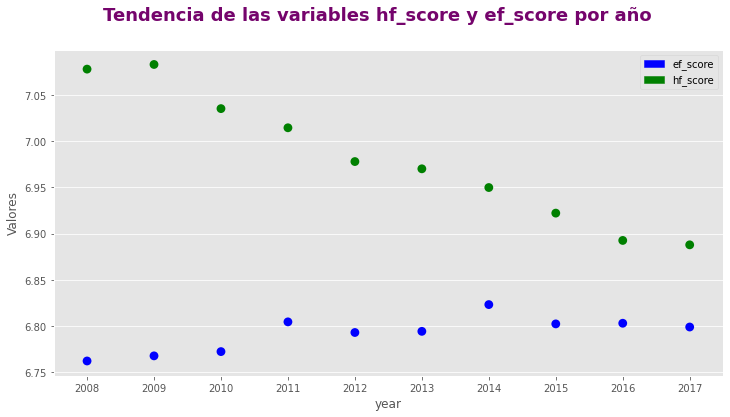

<Figure size 432x288 with 0 Axes>

In [64]:

import matplotlib.patches as mpatches
plt.figure(figsize=(12,6))
sns.pointplot(data=dataset.groupby('year')['ef_score'].mean().reset_index(), x='year', y='ef_score', color = "Blue", join=False, )
sns.pointplot(data=dataset.groupby('year')['hf_score'].mean().reset_index(), x='year', y='hf_score', color="Green", join=False, )
plt.legend(handles=[mpatches.Patch(color='Blue', label='ef_score'), mpatches.Patch(color='Green',label='hf_score')])
plt.ylabel('Valores')
plt.suptitle("Tendencia de las variables hf_score y ef_score por año",fontweight="bold", color="#75046C" ,size="18")
plt.figure()

Se puede notar que la variable hf_score (indice de libertad) se ha mantenido alejada de la variable ef_score (libertad económica) durante los primeros años de la investigación. Esto se debe, principalmente a que el hf_score se compone por dos indicadores principales: ef_score (libertad economica) y el pf_score (libertad personal). A priori, al ver como se comporta el hf_score y ef_score en los primeros años, el indicador de las libertades personales seguramente han mostrado valores superiores elevando el valor del hf_score a valores superiores.
Esta tendencia fue disminuyendo, encontrándose más cercana en el año 2017, donde el ef_score se mantuvo estable, y hf_score bajó su tendencia explicadas principalmente por las libertades personales, que como se viene observando en algunos países tiene un importante descenso para el año 2015, 2016 y 2017.


## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?



Para realizar este gráfico se decidió filtrar los datos del ultimo año para el caso de América Latina y el resto del mundo.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


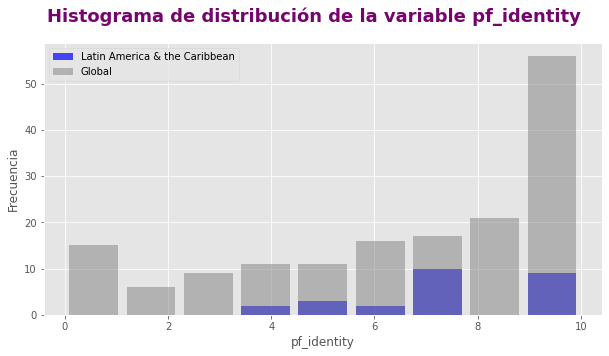

In [65]:
#Histograma que muestra la distribución de la variable 'pf_identity'
#en global y en Latinoamérica y el caribe.
Latinoamericayelcaribe = dataset[dataset.region == 'Latin America & the Caribbean']
Latinoamericayelcaribe = Latinoamericayelcaribe[dataset.year == 2017]

Global = dataset[dataset.region != "as"]
Global = Global[Global.year == 2017]
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(Latinoamericayelcaribe['pf_identity'], 9, range=[0, 10], 
                            facecolor='blue', alpha=0.7 , label='Latin America & the Caribbean',rwidth=0.85,align='mid')
n, bins, patches = plt.hist(Global['pf_identity'], 9, range=[0, 10], 
                            facecolor='grey', alpha=0.5,  label='Global',rwidth=0.85,align='mid')


plt.legend(loc='upper left')
plt.suptitle('Histograma de distribución de la variable pf_identity',fontweight="bold", color="#75046C" ,size="18")
plt.xlabel('pf_identity')
plt.ylabel('Frecuencia')
plt.show()


El indicador pf_identity muestra una distribución asimetrica izquierda tanto en los países de América Latina y como en la distribución del indicador en el resto del mundo.
El histograma es una herramienta gráfica que permite observar la cantidad de realizaciones que existen para cada uno de los valores de nuestro indicador analizado. Mediante esta gráfica se puede ver si la misma se aproxima a una distribución normal o no.
En este caso, ninguna de las distribuciones muestra un comportamiento normal, ambas acumulan la mayor cantidad de observaciones en valores mayores a los 5 puntos.
Es importante aclarar, que en la gráfica es posible que existan valores del indicador que no tienen ninguna realización (principalmente el caso de America latina), en consecuencia no existe barra en el histograma.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


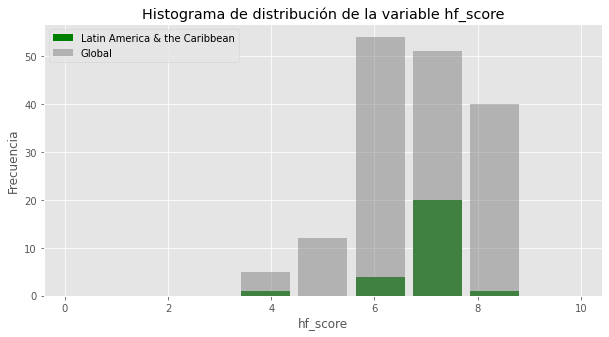

In [66]:
#Histograma que muestra la distribución de la variable 'hf_score'
#en global y en Latinoamérica y el caribe.
Latinoamericayelcaribe = dataset[dataset.region == 'Latin America & the Caribbean']
Latinoamericayelcaribe = Latinoamericayelcaribe[dataset.year == 2017]


Global = dataset[dataset.region != "as"]
Global = Global[Global.year == 2017]
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(Latinoamericayelcaribe['hf_score'], 9, range=[0, 10], 
                            facecolor='green', alpha=1 , label='Latin America & the Caribbean',rwidth=0.85,align='mid')
n, bins, patches = plt.hist(Global['hf_score'], 9, range=[0, 10], 
                            facecolor='grey', alpha=0.5,  label='Global',rwidth=0.85,align='mid')


plt.legend(loc='upper left')
plt.title('Histograma de distribución de la variable hf_score')
plt.xlabel('hf_score')
plt.ylabel('Frecuencia')
plt.show()

Tanto el indicador hf_score para el resto del mundo como para America latina sus valores no son distribuidos de forma normal y eso es principalmente porque ambas, principalmente la distribución del indicador del resto del mundo, acumula sus realizaciones en los valores intermedios-superiores del indicador (6,7 y 8).
 

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



**4.1 Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?**

In [67]:
dataset['pf_identity'].value_counts()
# Podemos ver que a pesar de que el rango de valores posibles va del 0 al 10 (con decimales), 
# no todos los valores se presentan en la distribucion. 

10.0    618
5.0     128
7.5     114
9.0     101
0.0     100
8.8     100
2.5      86
6.3      86
3.8      53
6.7      34
1.3      32
8.2      18
5.8      16
9.2       9
4.2       9
7.3       8
1.7       6
4.0       4
2.3       4
3.2       3
4.8       3
5.7       3
0.8       2
8.3       2
6.5       1
Name: pf_identity, dtype: int64

Text(0.5, 1.08, 'Relación entre variables')

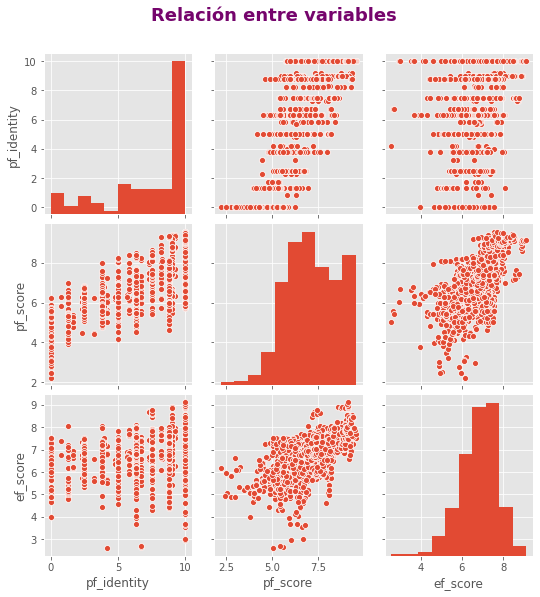

In [68]:
#plt.figure(figsize=(9, 3))
g=sns.pairplot(dataset, vars=["pf_identity", "pf_score","ef_score"])
g.fig.suptitle("Relación entre variables",fontweight="bold", color="#75046C" ,size="18", y=1.08)

Mediante el gráfico pairplot, se puede observar si existe relación entre las variables analizadas, mediante gráficos de dispersión.
En este caso se observa:
1) Una cierta relación positiva entre el indicador pf_identity y el pf score. Esta relación es de esperarse ya que uno de los indicadores que tiene en cuenta el pf_Score en su cálculo es el indicador de libertades de identidad (pf_identity)
2) A simple vista no se observa una relación entre pf_identity y ef_score, en consecuencia, para confirmar lo expuesto se tendría que calcular el coeficiente de correlación de pearson. 3) Entre los indicadores ef_score y pf_score parece que existe una relación directa, a pesar de que exista una mayor concentración de los datos en el centro de la gráfica.


Respecto a la pregunta 2: Si es o no adecuado para los valores de pf_identity, el problema que existe es que se percibe a grandes razgos un patron, que no se puede confirmar.

**4.2.Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.**

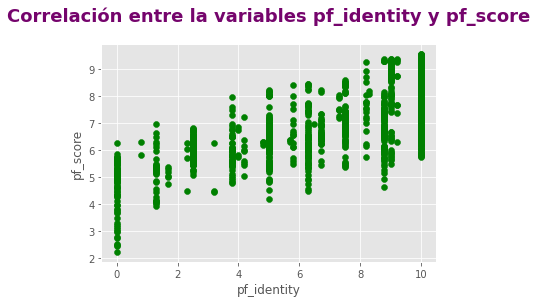

El valor de la correlación entre las dos variables es 0.7422085799035817


In [69]:
#Gráfico de correlación entre las variables'pf_identity' y 'pf_score'.
import matplotlib
%matplotlib inline
col_1 = dataset["pf_identity"]
col_2 = dataset["pf_score"]
matplotlib.style.use('ggplot')
plt.scatter(col_1, col_2,color="green")
plt.title('Correlación entre la variables pf_identity y pf_score',fontweight="bold", color="#75046C" ,size="18", y=1.08)
plt.xlabel('pf_identity')
plt.ylabel('pf_score')
plt.show()



#Además se agrega el el valor de la correlación entre las dos variables.
correlation = col_1.corr(col_2)
print("El valor de la correlación entre las dos variables es " + str(correlation))


La gráfica nos muestra una relación positiva entre los indicadores mencionados, y esta relación se ve confirmada mediante el cálculo del coeficiente de correlación que al positivo y valores mayores a 0,5 muestra una relación positiva medianamente fuerte.

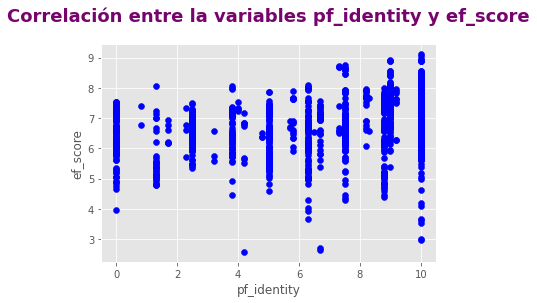


El valor de la correlación entre las dos variables es 0.3591510419500784


In [70]:
#Gráfico de correlación entre las variables'pf_identity' y 'ef_score'.
import matplotlib
%matplotlib inline
col_1 = dataset["pf_identity"]
col_2 = dataset["ef_score"]
matplotlib.style.use('ggplot')
plt.scatter(col_1, col_2,color="blue")
plt.title('Correlación entre la variables pf_identity y ef_score',fontweight="bold", color="#75046C" ,size="18", y=1.08)
plt.xlabel('pf_identity')
plt.ylabel('ef_score')
plt.show()
#Además se agrega el el valor de la correlación entre las dos variables.
correlation = col_1.corr(col_2)
print("\nEl valor de la correlación entre las dos variables es " + str(correlation))


A simple vista no se nota una relación directa entre las variables, por ello en estos casos, el cálculo del coeficiente de correlación es decisivo. En este caso al resultar un valor menor al 0,5, se puede decir que entre estos indicadores hay una relación positiva débil.

**4.3.Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores high, medium y low. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como pandas.cut o pandas.dcut. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.**

El criterio que utilizamos fue definir cada intervalo de acuerdo a los cuartiles de cada categoría. 

In [71]:
#Primero calculamos la mediana y los cuartiles de las 3 variables.
#Las variables son pf_identity, ef_score y pf_score.
mediana = dataset['pf_identity'].median()
p25 = dataset['pf_identity'].quantile(0.25)
p50 = dataset['pf_identity'].quantile(0.50)
p75 = dataset['pf_identity'].quantile(0.75)
print("pf_identity " + "\nMediana: " + str(mediana) + "\nPrimer  cuartil: " + str(p25) + "\nSegundo cuartil: " + str(p50) + "\nTercer  cuartil: " + str(p75) + "\n")

mediana = dataset['ef_score'].median()
p25 = dataset['ef_score'].quantile(0.25)
p50 = dataset['ef_score'].quantile(0.50)
p75 = dataset['ef_score'].quantile(0.75)
print("ef_score" + "\nMediana: " + str(mediana) + "\nPrimer  cuartil: " + str(p25) + "\nSegundo cuartil: " + str(p50) + "\nTercer  cuartil: " + str(p75) + "\n")

mediana = dataset['pf_score'].median()
p25 = dataset['pf_score'].quantile(0.25)
p50 = dataset['pf_score'].quantile(0.50)
p75 = dataset['pf_score'].quantile(0.75)
print("pf_score" + "\nMediana: " + str(mediana) + "\nPrimer  cuartil: " + str(p25) + "\nSegundo cuartil: " + str(p50) + "\nTercer  cuartil: " + str(p75) + "\n")

#No tengo en cuenta el cuartil 2 para obtener la banda de 50% en la identificación de cada segmento.
#Tener en cuenta el salto de los bins(De 1 creo).De última puede declararse una variable con -1 del cuartil.
#pf_score
dataset['pf_identity_segment'] = pd.cut(dataset.pf_identity,bins=[0,p25,p75,10],labels=['Low','Medium','High']) 
#Acá me parece que no corresponderían 3 tipos de segmentos low,medium y high, pensar que se puede hacer.
#dataset.insert(4,'pf_identity_segment',pf_identity_segment)

#ef_score
dataset['ef_score_segment'] = pd.cut(dataset.ef_score,bins=[0,p25,p75,10],labels=['Low','Medium','High'])
#dataset.insert(5,'ef_score_segment',ef_score_segment)

#pf_score
dataset['pf_score_segment'] = pd.cut(dataset.pf_score,bins=[0,p25,p75,10],labels=['Low','Medium','High'])
#dataset.insert(6,'pf_score_segment',pf_score_segment)



pf_identity 
Mediana: 8.8
Primer  cuartil: 5.0
Segundo cuartil: 8.8
Tercer  cuartil: 10.0

ef_score
Mediana: 6.88
Primer  cuartil: 6.22
Segundo cuartil: 6.88
Tercer  cuartil: 7.44

pf_score
Mediana: 7.145
Primer  cuartil: 6.147500000000001
Segundo cuartil: 7.145
Tercer  cuartil: 8.38



In [72]:
dataset[['pf_identity', 'pf_identity_segment']].sample(10) #Muestra sólo 10 países para corroborar que funcione.

,pf_identity,pf_identity_segment
1442,NaN,NaN
117,5.0,Low
932,0.0,NaN
1340,0.0,NaN
752,7.5,Medium
564,6.3,Medium
1310,7.5,Medium
407,10.0,High
44,0.0,NaN
1227,6.3,Medium


In [73]:
dataset[['pf_score', 'pf_score_segment']].sample(10) #Muestra sólo 10 países para corroborar que funcione.

,pf_score,pf_score_segment
323,5.42,Low
807,3.28,Low
963,5.24,Low
32,5.92,Low
1424,7.81,Medium
298,6.28,Medium
44,3.95,Low
1152,8.20,Medium
517,8.21,Medium
50,9.27,High


**4.4.Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.**

Un mapa de calor es una representación gráfica de los valores contenidos en una matriz mediante el uso de colores. La misma, es una herramienta excelente para para mostrar las relaciones existentes entre las variables de diferentes características, ya que al mostrar la relación mediante un color se obtiene una interpretación fácil e intuitiva de esta.

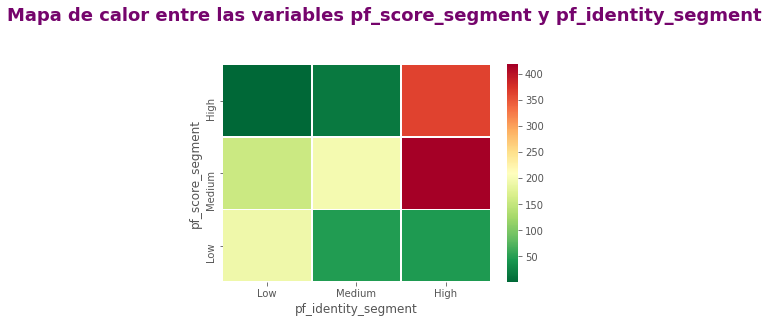

In [74]:
#Gráficos de calor de las variables pf_identity_segment y pf_score_segment.
col = ['Low','Medium','High']
row = col[::-1]
dataset['pf_identity_segment'] = dataset['pf_identity_segment'].str.strip("\'")
datasetq = dataset.groupby(['pf_score_segment','pf_identity_segment']).size().unstack(fill_value=0)
datasetq=datasetq[col]
datasetq=datasetq.reindex(row)
sns.heatmap(datasetq, cmap='RdYlGn_r', linewidths=0.5, annot=False)
plt.suptitle('Mapa de calor entre las variables pf_score_segment y pf_identity_segment',fontweight="bold", color="#75046C" ,size="18", y=1.08)
plt.show()




Mediante este gráfico se puede observar que en los niveles altos de pf_score y pf identity existe una relación medianamente fuerte ya que dicho color se ubica en los rangos superiores de la escala de colores. En un segundo lugar, la libertad personal en un rango mediano tiene una fuerte relación con la libertad de identidad en rangos altos.
En las démas combinaciones, si bien existe relación, la misma puede tornarse débil (color verde oscuro, verde claro y amarillo).

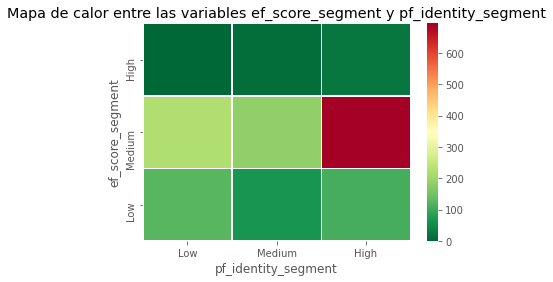

In [75]:
#Gráficos de calor de las variables pf_identity_segment y ef_score_segment.
dataset['pf_identity_segment'] = dataset['pf_identity_segment'].str.strip("\'")
datasetq = dataset.groupby(['ef_score_segment','pf_identity_segment']).size().unstack(fill_value=0)
datasetq=datasetq[col]
datasetq=datasetq.reindex(row)
sns.heatmap(datasetq, cmap='RdYlGn_r', linewidths=0.5, annot=False)
plt.title('Mapa de calor entre las variables ef_score_segment y pf_identity_segment')
plt.show()

Si se relacionan las variables de libertad económica con la libertad de identidad se observa una relación fuerte en la combinación de altos valores de libertad de identidad y valores medios en la libertad economica.
En el resto de las combinaciones se observa que la relaciones son débiles o nulas (represetadas por los colores verdes claros y oscuros, respectivamente). 

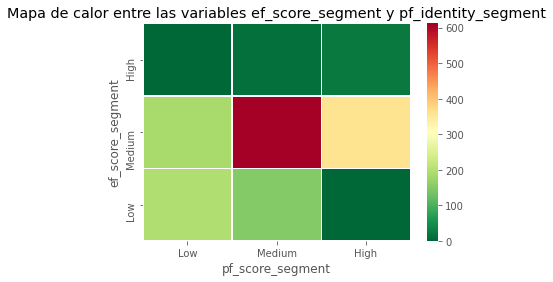

In [76]:
#Gráficos de calor de las variables pf_score_segment y ef_score_segment.
dataset['pf_score_segment'] = dataset['pf_score_segment'].str.strip("\'")
datasetq = dataset.groupby(['ef_score_segment','pf_score_segment']).size().unstack(fill_value=0)
datasetq=datasetq[col]
datasetq=datasetq.reindex(row)
sns.heatmap(datasetq, cmap='RdYlGn_r', linewidths=0.5, annot=False)

plt.title('Mapa de calor entre las variables ef_score_segment y pf_identity_segment')
plt.show()

Respecto a la variable de libertad económica y libertad de identidad se observa una relación fuerte cuando ambos niveles son medios (cuadrante bordó en la gráfica). En el resto de los casos las relaciones son practicamente nulas (verde oscuro) o bajas(verde claro y amarillo).

# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

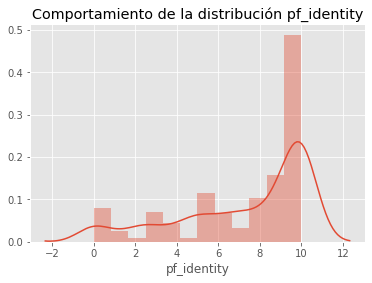

In [77]:
sns.distplot(dataset['pf_identity'].dropna())
stats.kstest(dataset['pf_identity'].dropna(), 'norm')
plt.title('Comportamiento de la distribución pf_identity')
plt.show()


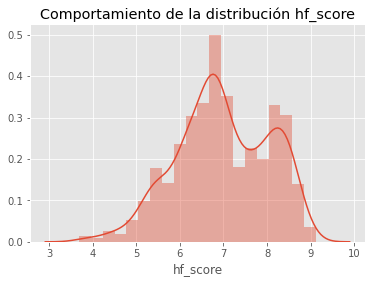

In [78]:
sns.distplot(dataset['hf_score'].dropna())
stats.kstest(dataset['hf_score'].dropna(), 'norm')
plt.title('Comportamiento de la distribución hf_score')
plt.show()


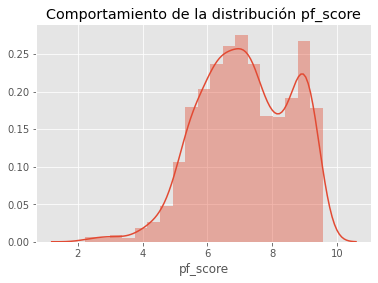

In [79]:
sns.distplot(dataset['pf_score'].dropna())
stats.kstest(dataset['pf_score'].dropna(), 'norm')
plt.title('Comportamiento de la distribución pf_score')
plt.show()

 La prueba de KS sirve para analizar la bondad de ajuste de una distribución con un modelo teórico. En este caso se plantea como h° tiene una distribución normal vs la h1 en la que la distribución no es normal para cada una de las distribuciones analizadas.
Al realizar la prueba, se obtiene un p valor muy chico de 0.0. El valor p nos muestra la probabilidad de haber obtenido el resultado que hemos obtenido suponiendo que la hipótesis nula H0 es cierta. Por lo tanto, al tener un valor tan bajo, se rechaza la hipotesis nula de normalidad, lo cual se concluye con un nivel de confianza predeterminado que la distribuciones no son normales en todos los casos.

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 


Si bien existen varias formas y metodos para analizar la correlación entre dos variables, es importante aplicar uno u otro dependiendo de las variables que se estan analizando.

1) Coeficiente de pearson es una medida que explicita el grado de asociación lineal que existe entre dos variables cuantitativas. En términos de la fuerza de la relación, el valor del coeficiente de correlación varía entre +1 y -1. Un valor de ± 1 indica un grado perfecto de asociación entre las dos variables. A medida que el valor del coeficiente de correlación va hacia 0, la relación entre las dos variables será más débil. La dirección de la relación se indica mediante el signo del coeficiente; un signo + indica una relación positiva y un signo - indica una relación negativa.
En cambio si analizamos el coeficiente de Spearman, si bien también analizamos la asociacion o relación entre dos variables cuantitativas mide una relación entre dos variables continuas u ordinales que si bien puede variar al mismo tiempo no lo hacen a ritmo constante. El coeficiente de correlación de Spearman se considera menos sensible, ya que si dos variables aumentan en una cantidad similar el coeficiente de pearson va mostrar una relación perfecta positiva, mientras que si no es en una misma cantidad el aumento su valor va a disminuir. En cambio si yo analizo el coeficiente de Spearman su valor seguira siendo +1 porque no tiene en cuenta las magnitudes.

Por último, el coefiente de Tau kendall se utiliza cuando la relación entre las variables cualitativas de tipo ordinal y su aplicación tiene un mayor sentido cuando las variables objeto de estudio no poseen una distribución conjunta normal. Este indicador está basado en rangos y no en los datos originales, su
estimación requiere que los valores de la variable ordinal sean transformados en rangos y no sera afectado por la presencia de valores atipicos.
Una característica notable del coeficiente de Kendall es que reporta valores más bajos con respecto a los coeficientes de Spearman y Pearson, en aquellas situaciones donde se analiza las asociaciones lineales con la misma intensidad.


En nuestro caso se eligieron por un lado, las varibles pf_identity y pf_score y por el otro, pf_identity y hf_score. Como las variables en analisis son cuantitativas no ordinales se decidio utilizar el coeficiente de Pearson como la medida descriptiva correcta para medir la asociación.


In [80]:
# Coeficiente de Pearson
#

print('== pf_identity vs pf_score ==')
print(dataset[['pf_identity', 'pf_score']].corr(method='pearson'))
print('\n== pf_identity vs hf_score ==')
print(dataset[['pf_identity', 'hf_score']].corr(method='pearson'))

== pf_identity vs pf_score ==
             pf_identity  pf_score
pf_identity     1.000000  0.742209
pf_score        0.742209  1.000000

== pf_identity vs hf_score ==
             pf_identity  hf_score
pf_identity     1.000000  0.643354
hf_score        0.643354  1.000000


Según el coeficiente de pearson se observa que entre la libertad personal y la libertad  de identidad existe una relación directa positiva medianamente fuerte ya que los valores son mayores a 0.5. En cambio cuando se analiza la variable de libertad de identidad con el indice general de libertad, si bien sigue existiendo una relación positiva esta es mas debil que la anterior (lo observamos con el valor de 0.64).

4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la región y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

In [81]:
#
# Coeficiente de Spearman
#
# Requisitos (sacados de internet...)
#   > Es no-parametrica (entiendo que la distribucion de la muesta no deberia coincidir con la normal o alguna de esas)
#   > Las variables deben ser ordinales (en este caso pf_identity no lo es...creo) 
#
#print('== pf_identity vs pf_score ==')
#print(dataset[['pf_identity', 'pf_score']].corr(method='spearman'))
#print('\n== pf_identity vs hf_score ==')
#print(dataset[['pf_identity', 'hf_score']].corr(method='spearman'))

In [82]:
#
# Coeficiente de Tau Kendall
#
#print('== pf_identity vs pf_score ==')
#print(dataset[['pf_identity', 'pf_score']].corr(method='kendall'))
#print('\n== pf_identity vs hf_score ==')
#print(dataset[['pf_identity', 'hf_score']].corr(method='kendall'))

Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?

El análisis realizado se podria haber hecho solo para un año particular, o comparando dos años para conseguir mas claridad y presición en los graficos realizados. 